#### 자주 사용하는 사이킷런 모듈
- sklearn.ensemble: 앙상블 알고리즘(RF, AdaBoost 등)
- sklearn.linear_model: 선형모델(선형회귀, 로지스틱회귀 등) 
- sklearn.svm: Support Vector Machines (SVM)
- sklearn.tree: 의사결정나무(Decision Trees)
- sklearn.neighbors : K-최근접이웃모델 (KNeighbors)

#### 사이킷런 기반 머신러닝 프레임워크    
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭
    - Ex) DecisionTreeClassifier(분류문제에 사용하는 의사결정나무) vs. DecisionTreeRegressor(회귀문제에 사용하는 의사결정나무)
- Classifier와 Regressor를 합쳐서 **Estimator** 클래스라고 함
    - ML 학습을 위해 fit()을, 예측을 위해 predict()를 제공  

# import library

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC

# 데이터 셋
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 검증
from sklearn.metrics import accuracy_score


## Data Load
- iris data
    - 꽃의 특성 (feature) 데이터 
        - [‘sepal length (cm)’, ‘sepal width (cm)’, ‘petal length (cm)’, ‘petal width (cm)’]    
            - sepal: 꽃받침 / petal: 꽃잎
    - target(y)는 세 가지의 꽃의 종류
        - 0: Setosa, 1: Versicolor, 2: Virginica
              

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### data & target

In [3]:
data = iris_df.iloc[:,:-1]
target = iris_df['target']

### train & test data 분리 

In [4]:
from sklearn.model_selection import train_test_split
# test 비율이 20%
# random_state (같은 데이터를 뽑을 수 있게)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 22)

In [5]:
X_train.shape

(120, 4)

In [6]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4
89,5.5,2.5,4.0,1.3
90,5.5,2.6,4.4,1.2
55,5.7,2.8,4.5,1.3
...,...,...,...,...
102,7.1,3.0,5.9,2.1
100,6.3,3.3,6.0,2.5
44,5.1,3.8,1.9,0.4
132,6.4,2.8,5.6,2.2


# SVM

- 분류 : SVC
- 회귀 : SVR

### 데이터 분할

In [7]:
X_train = iris_df.iloc[:, :2]
y_train = iris_df['target']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20)

### 2차원

##### kernel = 'linear'

###### C = 0.1, 1, 1000

In [9]:
from sklearn import svm

svm_01 = svm.SVC(kernel = 'linear', C = 0.1)
svm_01.fit(X_train, y_train)
pred = svm_01.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [10]:
svm_1 = svm.SVC(kernel = 'linear', C= 1)
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [11]:
svm_1000 = svm.SVC(kernel = 'linear', C= 1000)
svm_1000.fit(X_train, y_train)
pred = svm_1000.predict(X_test)
accuracy_score(pred, y_test)

0.7666666666666667

## 시각화

In [12]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

In [13]:
print(xx,yy)
print(xx.shape, yy.shape)
# 격자의 좌표 

[[3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 ...
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]
 [3.4   3.425 3.45  ... 8.825 8.85  8.875]] [[1.    1.    1.    ... 1.    1.    1.   ]
 [1.025 1.025 1.025 ... 1.025 1.025 1.025]
 [1.05  1.05  1.05  ... 1.05  1.05  1.05 ]
 ...
 [5.325 5.325 5.325 ... 5.325 5.325 5.325]
 [5.35  5.35  5.35  ... 5.35  5.35  5.35 ]
 [5.375 5.375 5.375 ... 5.375 5.375 5.375]]
(176, 220) (176, 220)


- meshgrid : 직사각형의 그리드 (격자) 안에 배치 될 수 있도록 하는 함수
- x_min-1 ~ x_max+1 / y_min-1 ~ y_max+1 사이에서 0.25 간격마다 그리드(격자) 생성

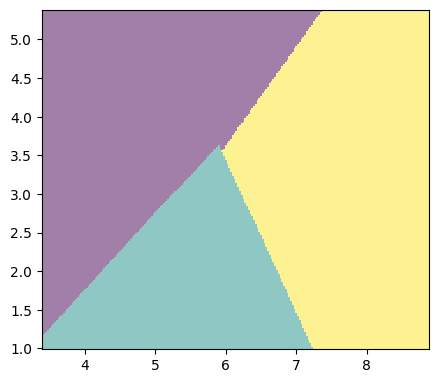

In [14]:
plt.figure(figsize = (5,15))
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)

ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_1,alpha=0.5)
# plt.pcolormesh() : 2D스타일의 색상 플롯 생성, alpha = 색상의 농도
plt.show()

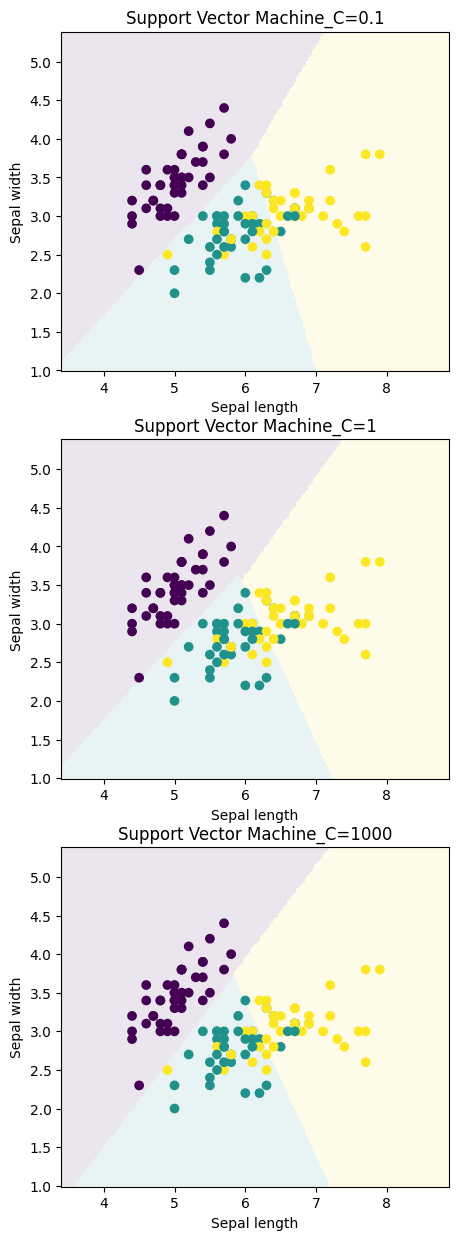

In [15]:
plt.figure(figsize = (5,15))

# C = 0.1

# 초평면을 만드는 과정
# np.c_[] : 같은 크기의 두 배열을 가로방향(왼쪽 -> 오른쪽)으로 합쳐줌
z_01=svm_01.predict(np.c_[xx.ravel(), yy.ravel()])
z_01=z_01.reshape(xx.shape)

ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_01,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.1')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax2 = plt.subplot(3,1,2, sharex = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 1000
z_1000=svm_1000.predict(np.c_[xx.ravel(), yy.ravel()])
z_1000=z_1000.reshape(xx.shape)
ax3 = plt.subplot(3,1,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1000,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1000')


plt.show()

- C가 클수록 hardmargin (초평면이 빡빡하게 형성)

##### kernel = 'polynomial'

###### C = 0.001, 1, 1000

In [16]:
svm_0001 = svm.SVC(kernel = 'poly', C = 0.001)
svm_0001.fit(X_train, y_train)
pred = svm_0001.predict(X_test)
accuracy_score(pred, y_test)

0.6666666666666666

In [17]:
svm_1 = svm.SVC(kernel = 'poly', C = 1)
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [18]:
svm_1000 = svm.SVC(kernel = 'poly', C = 1000)
svm_1000.fit(X_train, y_train)
pred = svm_1000.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [19]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

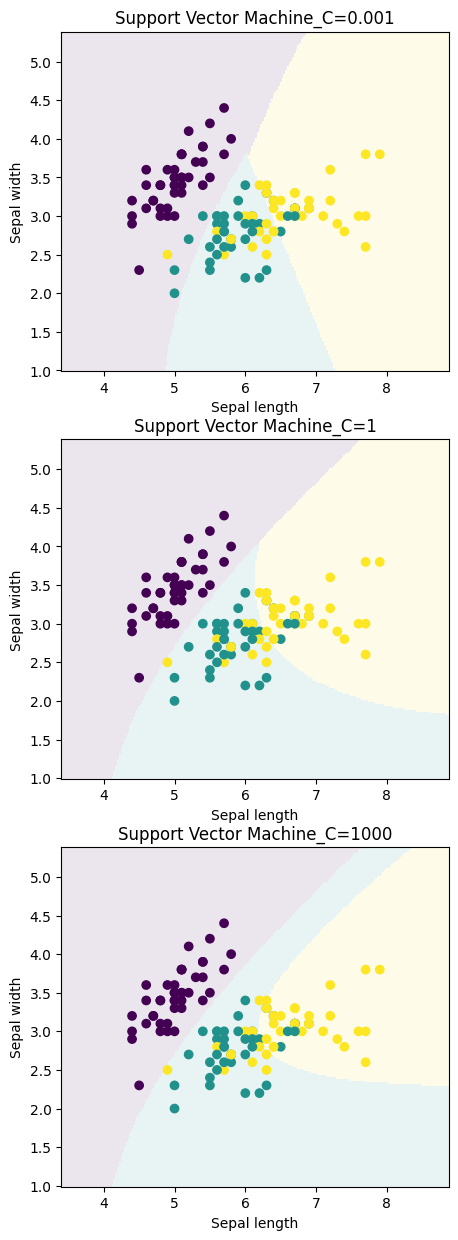

In [20]:
plt.figure(figsize = (5,15))

# C = 0.001
z_0001=svm_0001.predict(np.c_[xx.ravel(), yy.ravel()])
z_0001=z_0001.reshape(xx.shape)
ax1 = plt.subplot(3,1,1)
plt.pcolormesh(xx,yy,z_0001,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.001')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax2 = plt.subplot(3,1,2, sharex = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 1000
z_1000=svm_1000.predict(np.c_[xx.ravel(), yy.ravel()])
z_1000=z_1000.reshape(xx.shape)
ax3 = plt.subplot(3,1,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1000,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1000')


plt.show()

##### C에 따른 정확도 

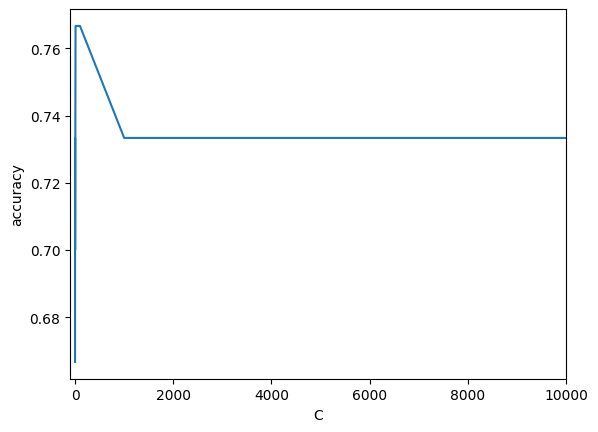

In [21]:
C = [0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy = []
from sklearn import svm
for c in C:
    svm_c = svm.SVC(kernel = 'poly', C = c)
    svm_c.fit(X_train, y_train)
    pred = svm_c.predict(X_test)
    scores = accuracy_score(pred, y_test)
    accuracy.append(scores)
    
plt.plot(C, accuracy)
plt.xlabel('C')
plt.xlim(-100, 10000)
plt.ylabel('accuracy')
plt.show()

### kernel = 'rbf'

###### C =  0.1, 1, 100 
###### gamma = 1, 10 , 100

In [22]:
svm1_1 = svm.SVC(kernel = 'rbf', C =1 , gamma = 1)
svm1_1.fit(X_train, y_train)
pred = svm1_1.predict(X_test)
accuracy_score(pred, y_test)

0.7666666666666667

In [23]:
svm1_10 = svm.SVC(kernel = 'rbf', C =1, gamma = 10)
svm1_10.fit(X_train, y_train)
pred = svm1_10.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [24]:
svm1_100 = svm.SVC(kernel = 'rbf', C =1, gamma = 100)
svm1_100.fit(X_train, y_train)
pred = svm1_100.predict(X_test)
accuracy_score(pred, y_test)

0.6666666666666666

In [25]:
svm_01 = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 'auto')
svm_01.fit(X_train, y_train)
pred = svm_01.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [26]:
svm_1 = svm.SVC(kernel = 'rbf', C = 1, gamma = 'auto')
svm_1.fit(X_train, y_train)
pred = svm_1.predict(X_test)
accuracy_score(pred, y_test)

0.7333333333333333

In [27]:
svm_100 = svm.SVC(kernel = 'rbf', C = 100, gamma = 'auto')
svm_100.fit(X_train, y_train)
pred = svm_100.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [28]:
x_min, x_max=X_train.iloc[:,0].min()-1, X_train.iloc[:,0].max()+1
y_min, y_max=X_train.iloc[:,1].min()-1,X_train.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

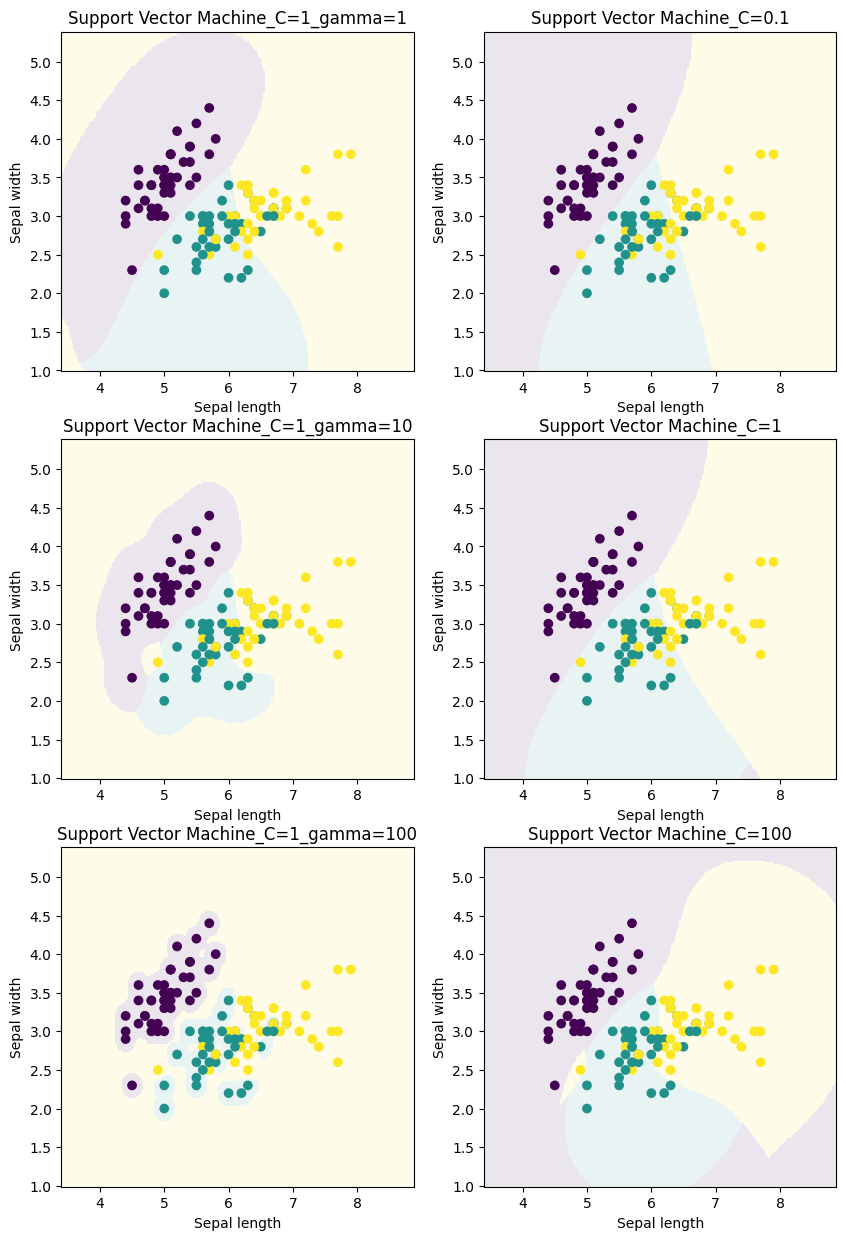

In [29]:
plt.figure(figsize = (10,15))

# C = 1, gamma = 1 
z_1_1=svm1_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_1=z_1_1.reshape(xx.shape)
ax1 = plt.subplot(3,2,1)
plt.pcolormesh(xx,yy,z_1_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=1')

# C = 1, gamma = 10
z_1_10=svm1_10.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_10=z_1_10.reshape(xx.shape)
ax2 = plt.subplot(3,2,3, sharex = ax1)
plt.pcolormesh(xx,yy,z_1_10,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=10')

# C = 1, gamma = 1000
z_1_100=svm1_100.predict(np.c_[xx.ravel(), yy.ravel()])
z_1_100=z_1_100.reshape(xx.shape)
ax3 = plt.subplot(3,2,5, sharex = ax1)
plt.pcolormesh(xx,yy,z_1_100,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1_gamma=100')

# C = 0.1
z_01=svm_01.predict(np.c_[xx.ravel(), yy.ravel()])
z_01=z_01.reshape(xx.shape)
ax4 = plt.subplot(3,2,2, sharey = ax1)
plt.pcolormesh(xx,yy,z_01,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=0.1')

# C = 1
z_1=svm_1.predict(np.c_[xx.ravel(), yy.ravel()])
z_1=z_1.reshape(xx.shape)
ax5 = plt.subplot(3,2,4, sharey = ax1)
plt.pcolormesh(xx,yy,z_1,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=1')

# C = 100
z_100=svm_100.predict(np.c_[xx.ravel(), yy.ravel()])
z_100=z_100.reshape(xx.shape)
ax6 = plt.subplot(3,2,6, sharey = ax1)
plt.pcolormesh(xx,yy,z_100,alpha=0.1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine_C=100')

plt.show()

### 4차원 ( 시각화 불가능 )

In [30]:
data=iris_df.iloc[:, :-1]
target=iris_df['target']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state= 111)

In [32]:
svm_linear = svm.SVC(kernel = 'linear', C = 1)
svm_linear.fit(X_train, y_train)
pred = svm_linear.predict(X_test)
accuracy_score(pred, y_test)

0.9666666666666667

- 2차원일 때 같은 조건 하 정확도가 0.8 

In [33]:
svm_poly = svm.SVC(kernel = 'poly', C = 1)
svm_poly.fit(X_train, y_train)
pred = svm_poly.predict(X_test)
accuracy_score(pred, y_test)

0.9

- kernel 이나 C 같은 하이퍼파라미터는 튜닝을 거쳐 가장 좋은 성능을 띄는 모델을 찾아야 함 -> 하이퍼파라미터 튜닝